
Assignment - Wine Classification
---


#**Naman Kaushik**
# **17134020**
# **Mechanical Engineering Part-III**

In [1]:
# Importing Required Libraries and Functions
import pandas as pd
from keras import Model
from keras import Sequential 
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras import Input, activations, optimizers
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Wine Classification**
##[Dataset](https://archive.ics.uci.edu/ml/datasets/Wine)
## Number Classes - 3
## Nuber of Features - 13



In [2]:
# Loading Data 
df = pd.read_csv('/content/drive/My Drive/ML-Assignment/wine.csv', header = None)
# Shuffeling Data
df.sample(frac=1).reset_index(drop=True)
Y = (df.iloc[:,:1]).to_numpy()
X = (df.iloc[:,1:14]).to_numpy()
Y = Y-1
# One-hot representing the classes
Y = to_categorical(Y)
# Spliting test and train data
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)



In [3]:
# List of parameter tuples [learning rate, number of neurons in hidden layer 10 different combinations
hyper_para = [[1e-3,26],[1e-3,52],[1e-3,104],[1e-3,208],[1e-2,26],[1e-3,52],[1e-3,104],[1e-3,208],[5e-3,104],[5e-3,208]]



In [4]:
# Function to create the model
# 13->neurons_hidden_layer->3(classes)
def classification_model(n_neurons):
  inputs = Input(shape=(13,))
  x = Dense(n_neurons,activation='relu')(inputs)
  out = Dense(3,activation='softmax')(x)
  
  model = Model(inputs=inputs, outputs=out)

  return model

In [5]:
# KFold Cross validation on the model by intialzing it randomly 20 times with 10 different model parameter
acc = []

for learning_rate, n_neurons in hyper_para:
  best_acc = 0
  for i in range(20):
    model = classification_model(n_neurons)
    opt = optimizers.Adam(lr = learning_rate)
    model.compile(optimizer= opt,loss='categorical_crossentropy',metrics=['accuracy'])
    kfold = KFold(n_splits = 3 , shuffle = True)
    for train, test in kfold.split(X_train,Y_train):
      history = model.fit( X_train[train], Y_train[train],batch_size=10,verbose=2,shuffle= True)
      scores = model.evaluate(X_train[test], Y_train[test],verbose=2)
      loss = scores[0]
      loss_dif = 1
      epoch = 1
      while loss_dif>1e-5:
        history = model.fit( X_train[train], Y_train[train],batch_size=10,verbose=0,shuffle= True)
        scores = model.evaluate(X_train[test], Y_train[test],verbose=0)
        loss_dif = loss - scores[0]
        loss = scores[0]
        epoch +=1
        # if epoch>250:
        #   break
      if scores[1]>best_acc:
        best_acc = scores[1]
        best_epoch = epoch
      print("Minimum loss = ",loss)
    acc.append([i,best_acc,best_epoch])

Epoch 1/1
 - 0s - loss: 219.8322 - accuracy: 0.2439
Minimum loss =  14.716963540940057
Epoch 1/1
 - 0s - loss: 12.9162 - accuracy: 0.4819
Minimum loss =  1.2156660382340594
Epoch 1/1
 - 0s - loss: 1.2314 - accuracy: 0.5542
Minimum loss =  0.7047304067669845
Epoch 1/1
 - 0s - loss: 18.7390 - accuracy: 0.2805
Minimum loss =  4.841940448397682
Epoch 1/1
 - 0s - loss: 4.1710 - accuracy: 0.3012
Minimum loss =  1.3717357269147548
Epoch 1/1
 - 0s - loss: 1.1597 - accuracy: 0.3855
Minimum loss =  1.4298629004780838
Epoch 1/1
 - 0s - loss: 295.0419 - accuracy: 0.2561
Minimum loss =  3.701830432528541
Epoch 1/1
 - 0s - loss: 4.1970 - accuracy: 0.3976
Minimum loss =  1.2014283930383078
Epoch 1/1
 - 0s - loss: 1.2158 - accuracy: 0.7229
Minimum loss =  1.7603890721390887
Epoch 1/1
 - 0s - loss: 63.8998 - accuracy: 0.3171
Minimum loss =  1.9612740675608318
Epoch 1/1
 - 0s - loss: 1.4781 - accuracy: 0.6265
Minimum loss =  1.217893774916486
Epoch 1/1
 - 0s - loss: 1.2183 - accuracy: 0.6386
Minimum los

In [6]:
# Looking for best model parameters
pn = 0
aa = 0
para_idx = []
acc_dist = []
for i,a,epochs in acc:
  if i == 0:
    pn +=1
  if a>aa:
    aa = a
    ba = pn
    be = epochs
  para_idx.append(pn)
  acc_dist.append(a*100)

print("Best parameter was: leraning rate - ",hyper_para[ba-1][0],", no.of neurons - ",hyper_para[ba-1][1],"Epochs - ",be,"With accuracy of  ",aa*100,"%")



Best parameter was: leraning rate -  0.001 , no.of neurons -  52 Epochs -  3 With accuracy of   95.12194991111755 %


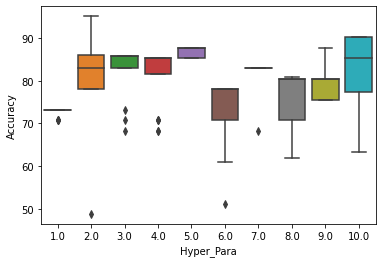

In [7]:
# Box Plot 
para_idx = np.array(para_idx).reshape(200,1)
acc_dist = np.array(acc_dist).reshape(200,1)
dd = np.concatenate((para_idx,acc_dist),axis=1)
dd = pd.DataFrame(data=dd, columns=["Hyper_Para", "Accuracy"])
ax = sns.boxplot(x="Hyper_Para", y="Accuracy",data = dd)

In [8]:
#Best Model
model = classification_model(hyper_para[ba-1][1])
opt = optimizers.Adam(lr = hyper_para[ba-1][0])
model.compile(optimizer= opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "model_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_201 (InputLayer)       (None, 13)                0         
_________________________________________________________________
dense_401 (Dense)            (None, 52)                728       
_________________________________________________________________
dense_402 (Dense)            (None, 3)                 159       
Total params: 887
Trainable params: 887
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Fitting on Best Model
history = model.fit( X_train, Y_train,batch_size=10,verbose=2,shuffle= True)
loss = history.history["loss"][0]
loss_dif = 1
epoch = 1
while loss_dif>1e-5:
  history = model.fit( X_train[train], Y_train[train],batch_size=10,verbose=0,shuffle= True)
  loss_dif = loss - history.history["loss"][0]
  loss = history.history["loss"][0]
  epoch +=1
  print(epoch)

Epoch 1/1
 - 0s - loss: 283.4399 - accuracy: 0.4032
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [10]:
# Evaluating model on Test Data
scores = model.evaluate(X_test,Y_test,verbose=2)
scores[1]

0.8703703880310059

In [11]:
# Storing Prediction
predicted = model.predict(X_test)


In [13]:
# Calculating Rank
final_pre_max = np.argmax(predicted, axis=1)
Y_true_max = np.argmax(Y_test,axis=1)
final_pre_min = np.argmin(predicted, axis=1)
Y_true_min = np.argmin(Y_test,axis=1)
rank1 = 0
rank2 = 0
rank3 = 0
for i in range(len(Y_test)):
  if final_pre_max[i]==Y_true_max[i]:
    rank1 +=1
  elif final_pre_min[i]==Y_true_max[i]:
    rank3 +=1
  else:
    rank2 +=1
rank2 +=rank1
rank3 +=rank2

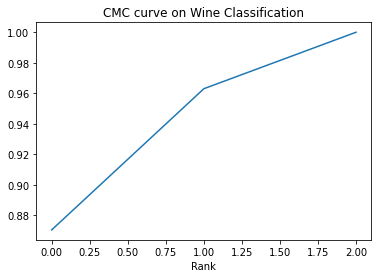

In [15]:
# Plotting CMC Curve
plt.plot([rank1/len(Y_test) , rank2/len(Y_test), rank3/len(Y_test)])
plt.xlabel('Rank')
plt.title('CMC curve on Wine Classification')
plt.show()